# Лекция 2. Элементарные методы анализа временных рядов

In [4]:
import pandas as pd
import numpy as np

In [5]:
sales_of_company_x = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/monthly-boston-armed-robberies-j.csv")
robberies_in_boston = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("D:/Documents/python_projects/Netology/venv/times_series/1_introductions_with_times_series/1._Лекция_tsml/Series/daily-total-female-births-in-cal.csv")

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

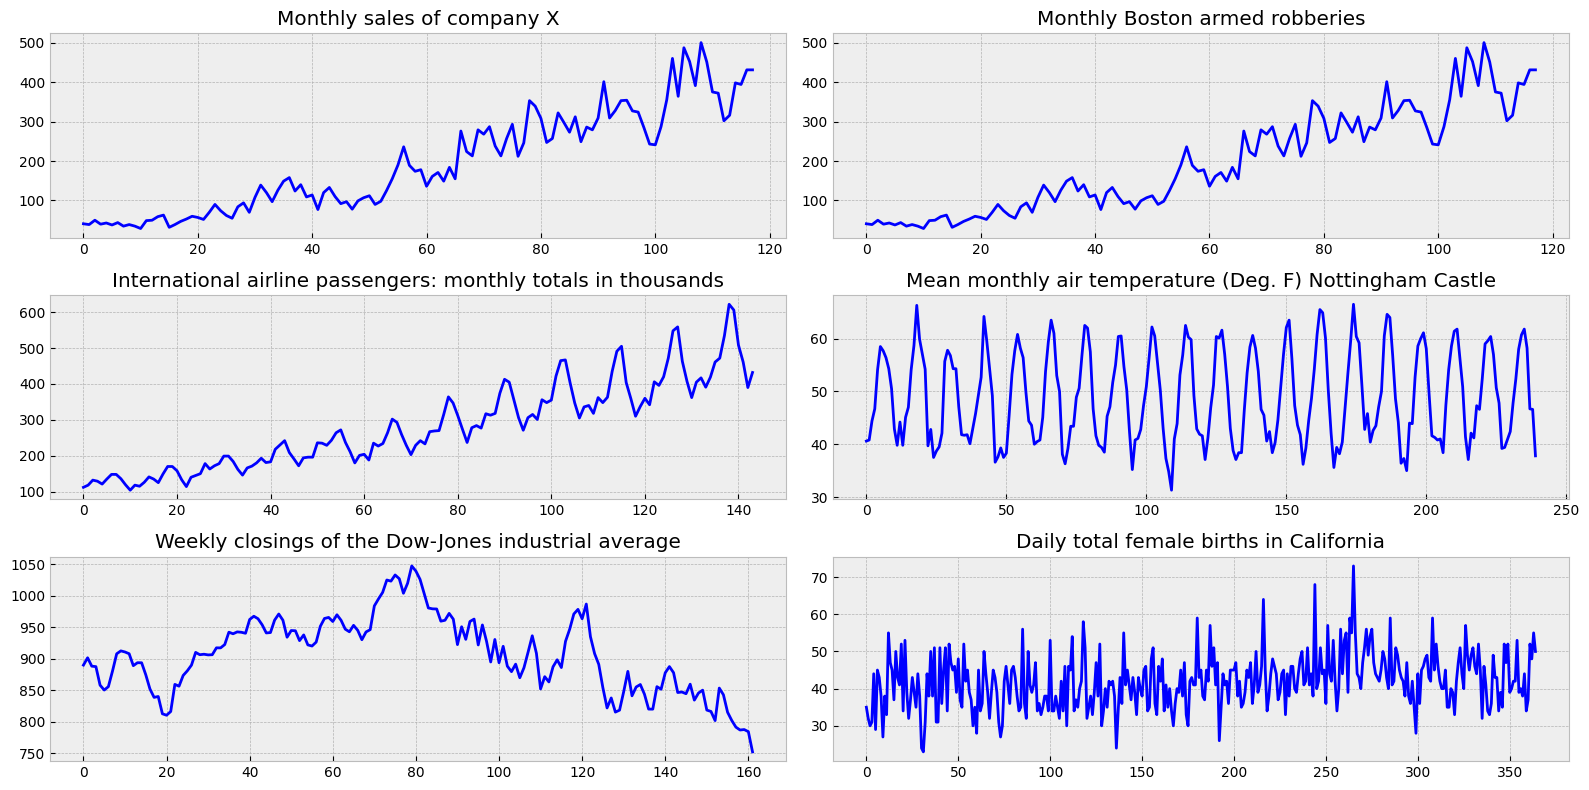

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Скользящее среднее

Начнем моделирование с наивного предположения - "завтра будет, как вчера", но вместо просто предсказания вида $\hat{y}_{t} = y_{t-1}$ будем считать, что будущее значение переменной зависит от среднего $n$ её предыдущих значений

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k-1}_{n=0} y_{t-n}$

В данном случае $\hat{y}_{t}$ называется скользящей средней

In [9]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [10]:
ser = moving_average(sales_of_company_x["Count"], 7)

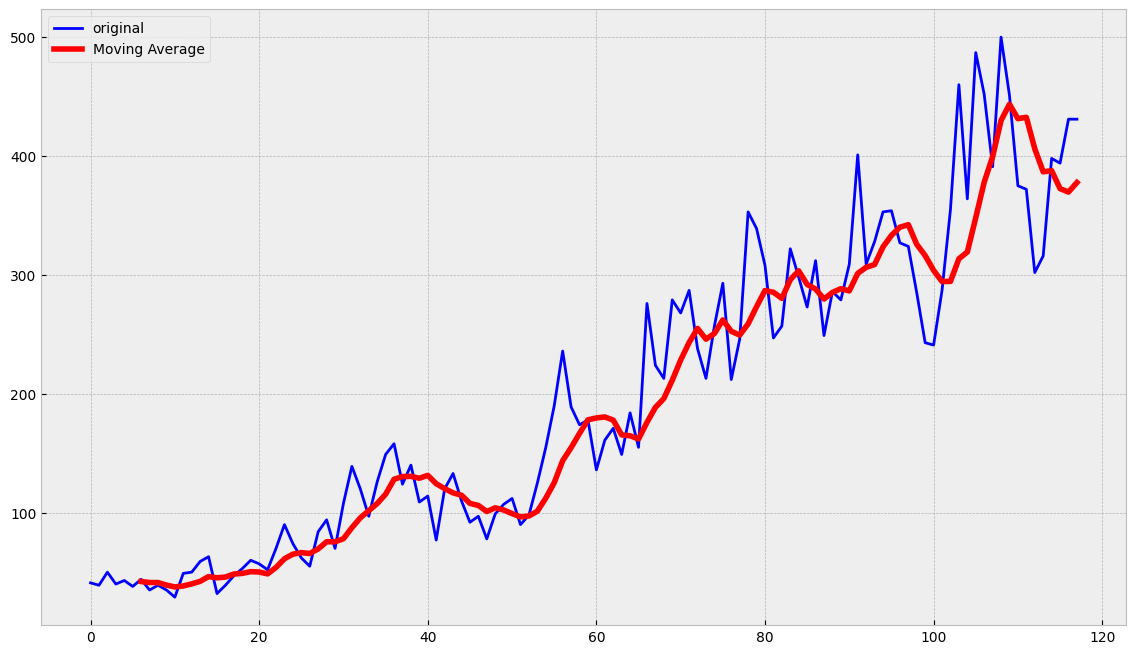

In [11]:
ser = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 1. В настоящем примере функция MA просто усредняет ряд. Напишите функцию, которая предсказывает 5 следующих измерений

In [12]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_value = pd.Series([new_series[-N:].mean()])
        new_series = pd.concat([new_series, new_value], ignore_index=True)
    return new_series

In [13]:
series_pred = predict(sales_of_company_x["Count"], 7, 50)

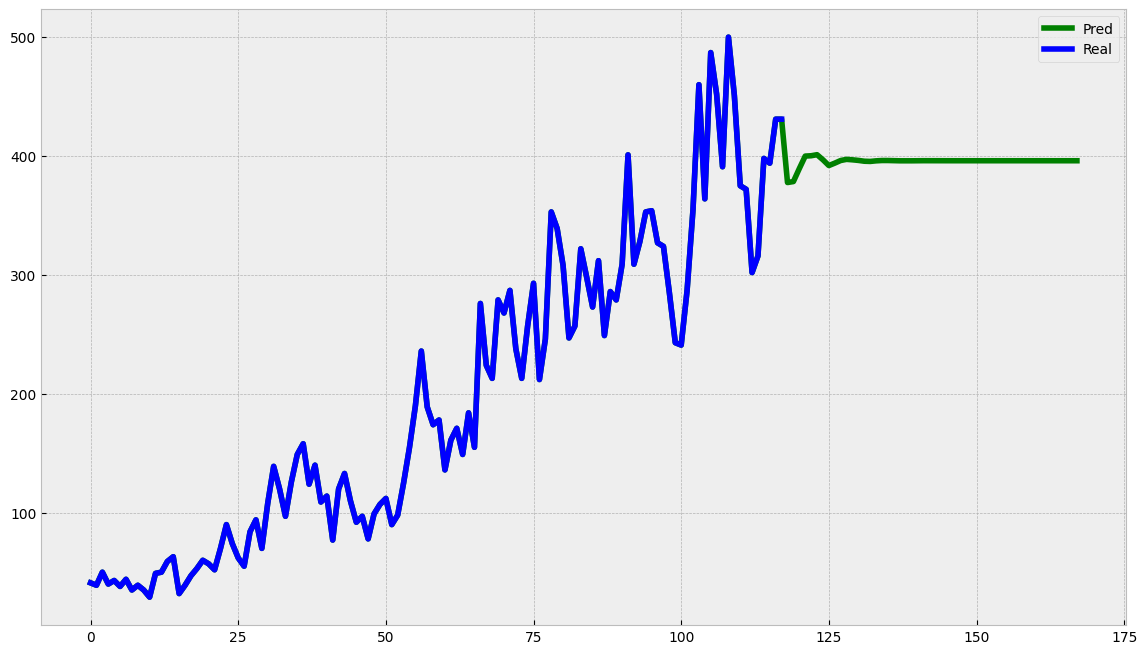

In [14]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(sales_of_company_x["Count"], color='blue', linewidth='4', label='Real')
    plt.legend()

Чем больше размер "окна" скользящего среднего $n$ тем более сглаженным получается результат. По нескольким скользящим средним можно увидеть периоды резкого роста и резкого спада.

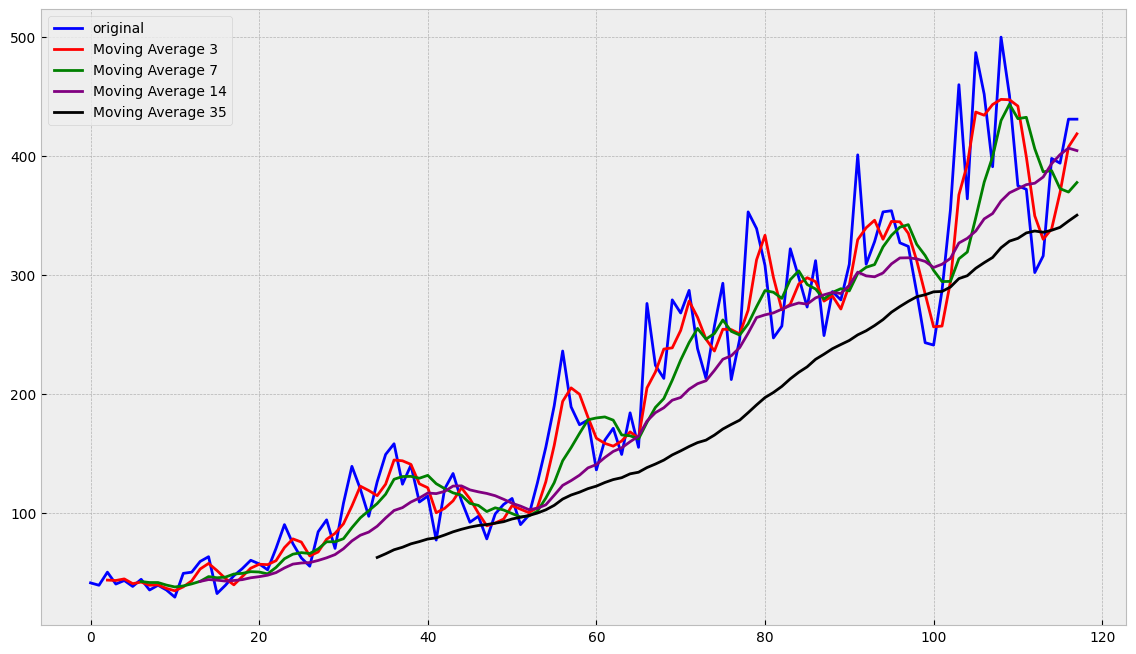

In [15]:
windows = [3,7,14,35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(sales_of_company_x["Count"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

Характерная особенность обычного скользящего среднего - повышенная чувствительность к выбросам данных

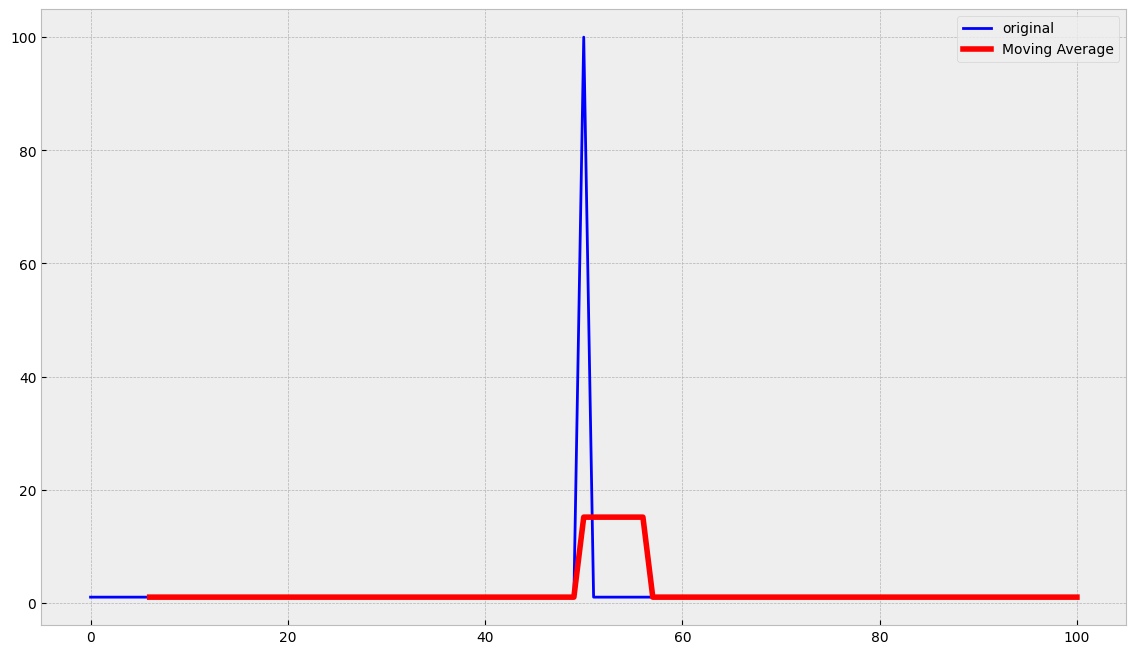

In [16]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ser = moving_average(ts, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

В случае сильно зашумленных данных скользящее среднее помогает определить тренд

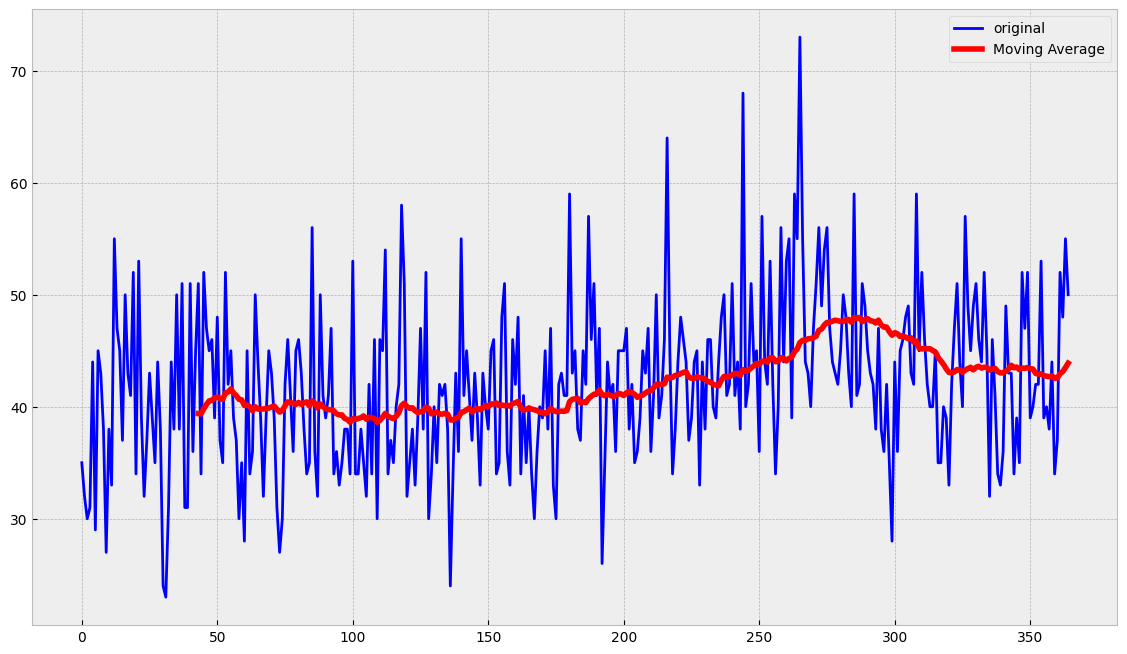

In [17]:
ts = female_births['Count']
ser = moving_average(ts, 44)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 2. Сгенерируйте случайный шум и усредните его скользящим средним.

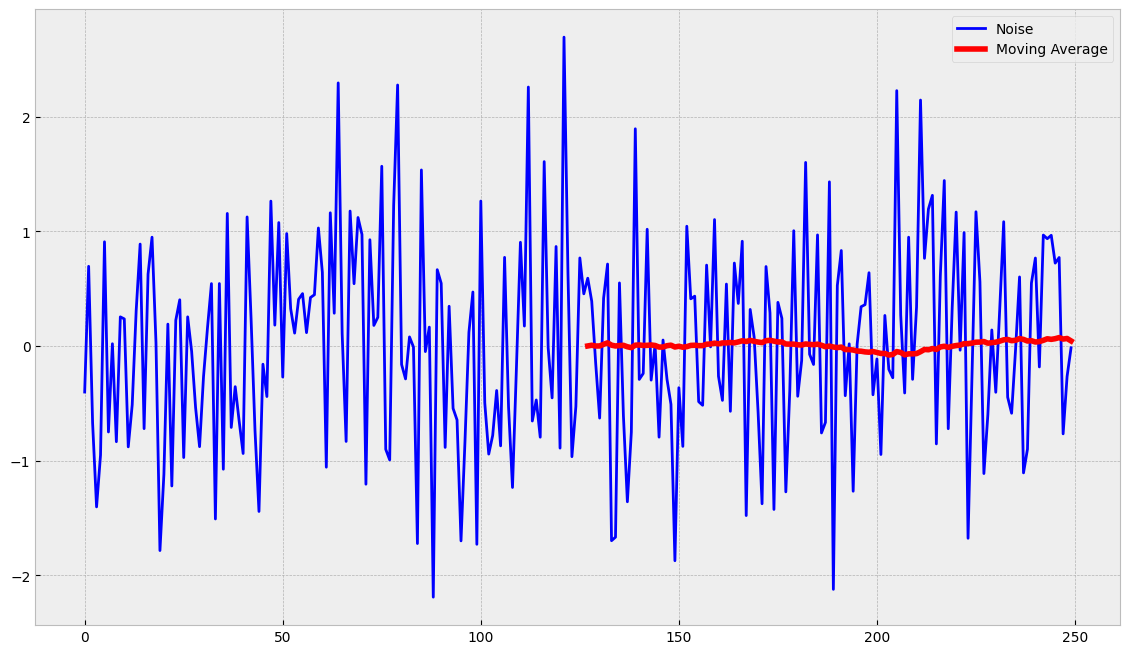

In [18]:
random_noise = pd.Series(np.random.randn(250))
ma_on_noise = moving_average(random_noise, 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise, color='blue',label='Noise')
    plt.plot(ma_on_noise, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 3. Сгенерируйте случайный шум с трендом и усредните его скользящим средним

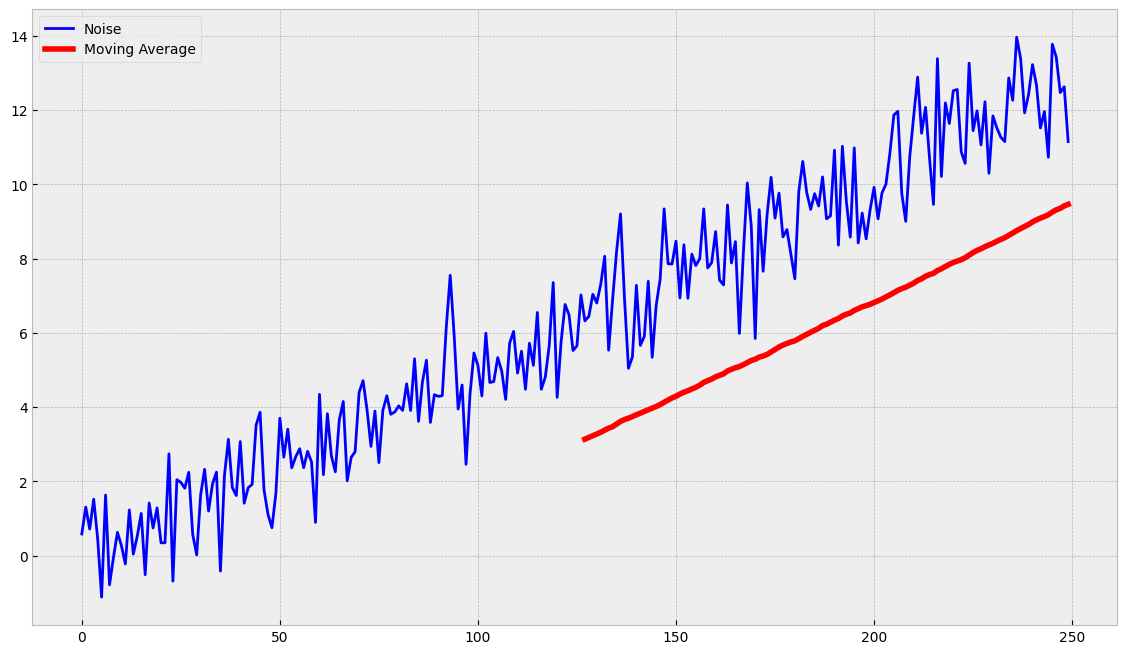

In [19]:
random_noise = np.random.randn(250)
k = 0.05
b = 0
random_noise_trend = pd.Series([k*i + b + random_noise[i] for i in range(len(random_noise))])
ma_on_noise_trend = moving_average(random_noise_trend, 128)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise_trend, color='blue',label='Noise')
    plt.plot(ma_on_noise_trend, color='red', linewidth='4', label='Moving Average')
    plt.legend()

Модификацией обычной скользящей средней является взвешенная скользящая средняя.

$\hat{y}_{t} = \displaystyle\sum^{k}_{n=1} \omega_n y_{t+1-n}$

$\displaystyle\sum^{k}_{n=1} {\omega_n} = 1$

Обычно чем ближе измерение к прогнозируемому - тем больше его вес

In [20]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

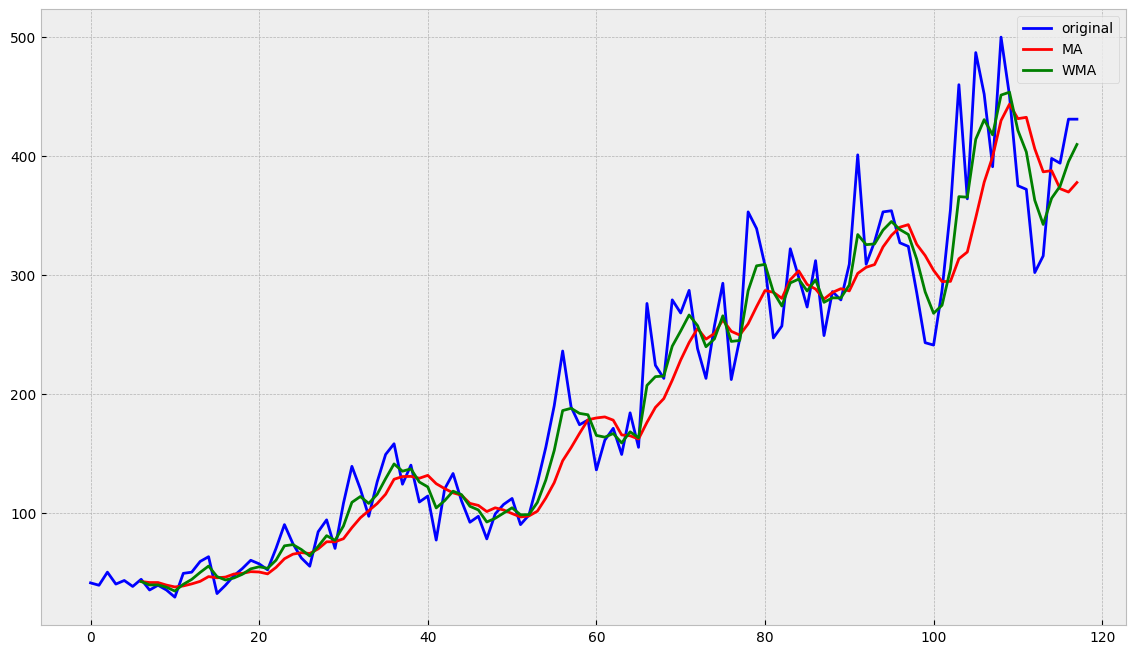

In [21]:
wma = weighted_moving_average(sales_of_company_x["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

Такая вариация moving average позволяет учитывать временной контекст. Чем раньше было событие - тем меньше оно влияет на прогнозируемое событие

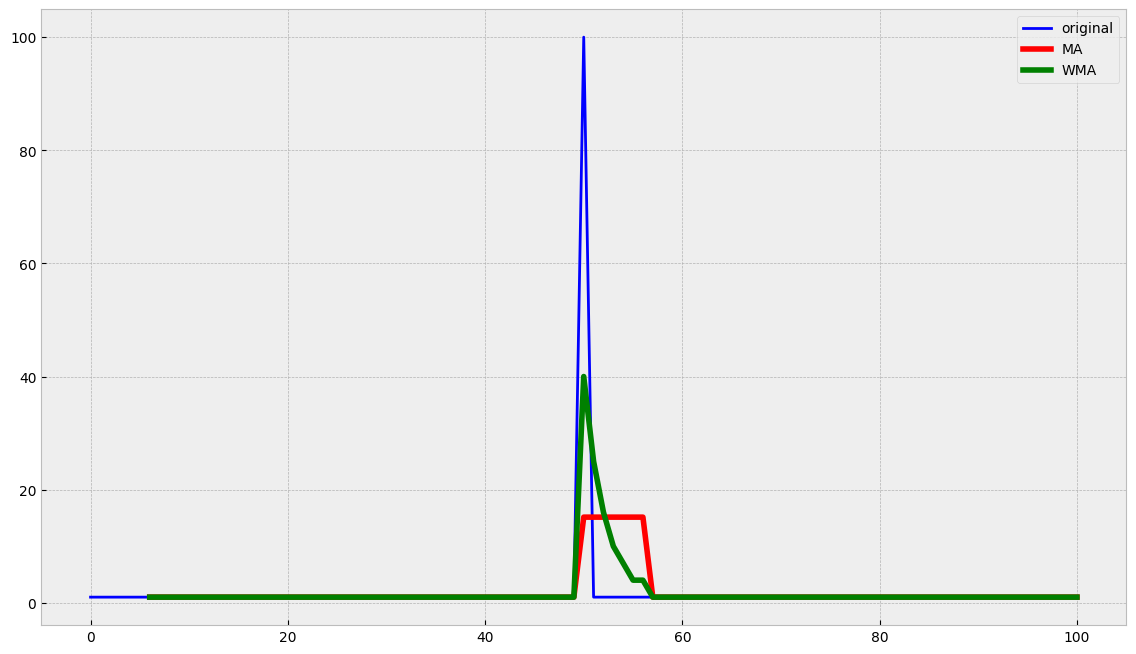

In [22]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ma = moving_average(ts, 7)
wma = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='4', label='MA')
    plt.plot(wma, color='green', linewidth='4', label='WMA')
    plt.legend()

### Практика 4. Возьмите ряд Monthly Boston armed robberies и примените к нему wma. В качестве коэффициентов рассмотрите числа Фиббоначи, последовательные числа и степени двойки

In [23]:
series = robberies_in_boston["Count"]
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

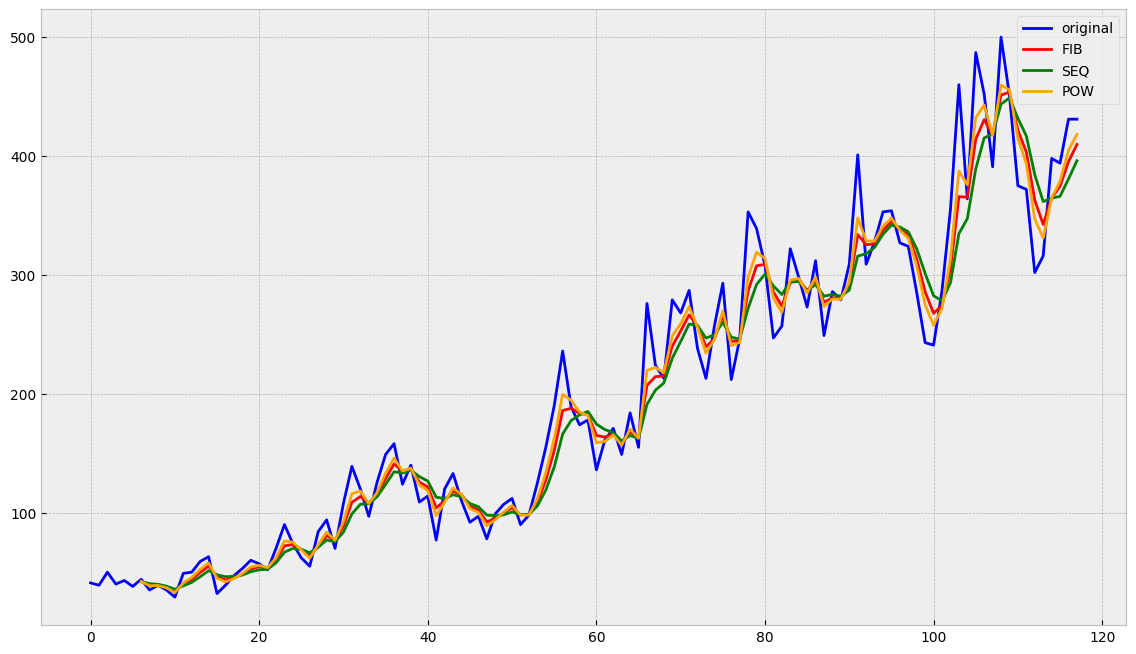

In [24]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue',label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

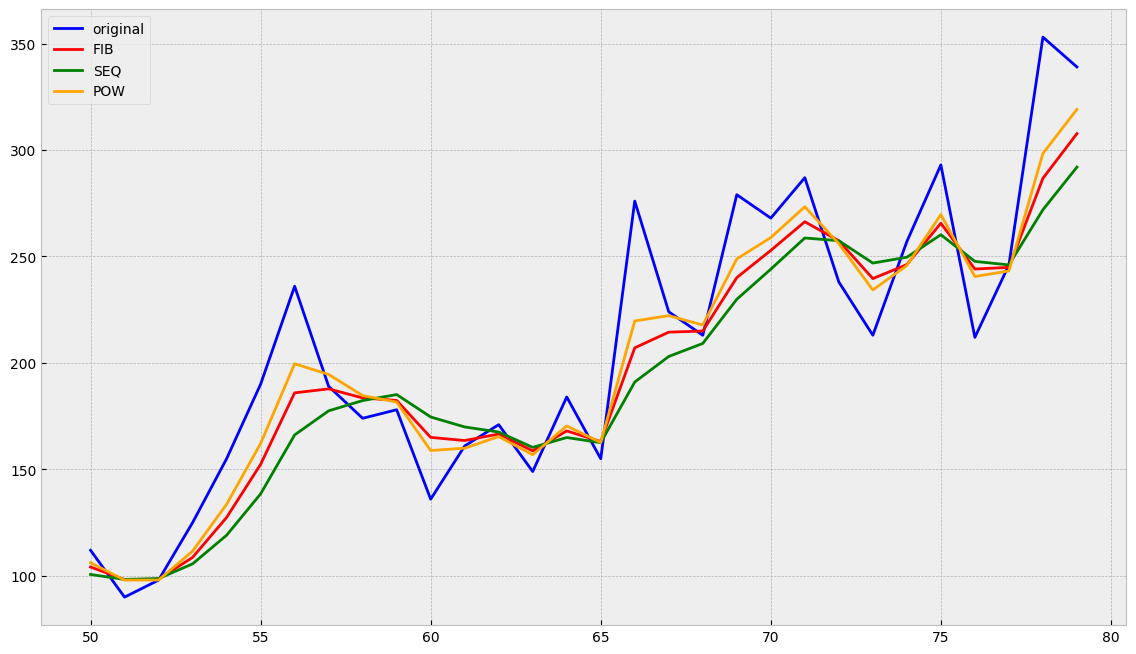

In [25]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series[50:80], color='blue',label='original')
    
    plt.plot(wma_fib[50:80], color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq[50:80], color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow[50:80], color='orange', linewidth='2', label='POW')
    plt.legend()

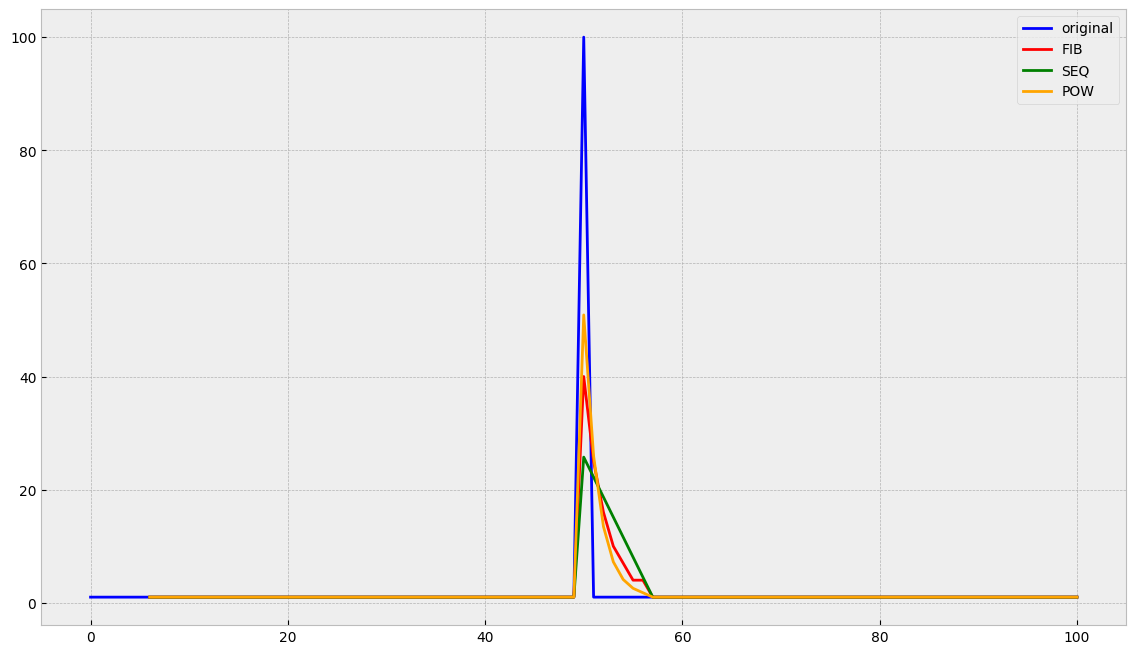

In [26]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
wma_fib = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(ts, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(ts, 7, [1,2,4,8,16,32,64])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

# Экспоненциальное сглаживание

Продолжаем развивать идею с историей. Мы хотим учитывать на самом деле учитывать не какой-то фиксированный набор измерений. В идеале - мы хотим учитывать всю историю измерений, накопившуюся к текущему моменту. Просто, как и в случае WMA, чем дальше измерение - тем меньше вклад. Для этого используется экспоненциальное скользящее среднее:

$$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1} $$

В нем предсказанное значение - это взвешеное срденее между последним наблюдением и предыдущей историей. Легко заметить, что формула рекурсивна. Параметр $\alpha$ называется сглаживающим фактором. Он определяет, как сильно мы будем опираться на историю (чем меньше - тем больше). Чем меньше $\alpha$, тем больше влияния оказывают предыдущие предсказанные значения, и тем сильнее сглаживается ряд. 

In [27]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(result)

In [28]:
ema = exponential_moving_average(sales_of_company_x["Count"], 0.2)

In [29]:
len(ema)

118

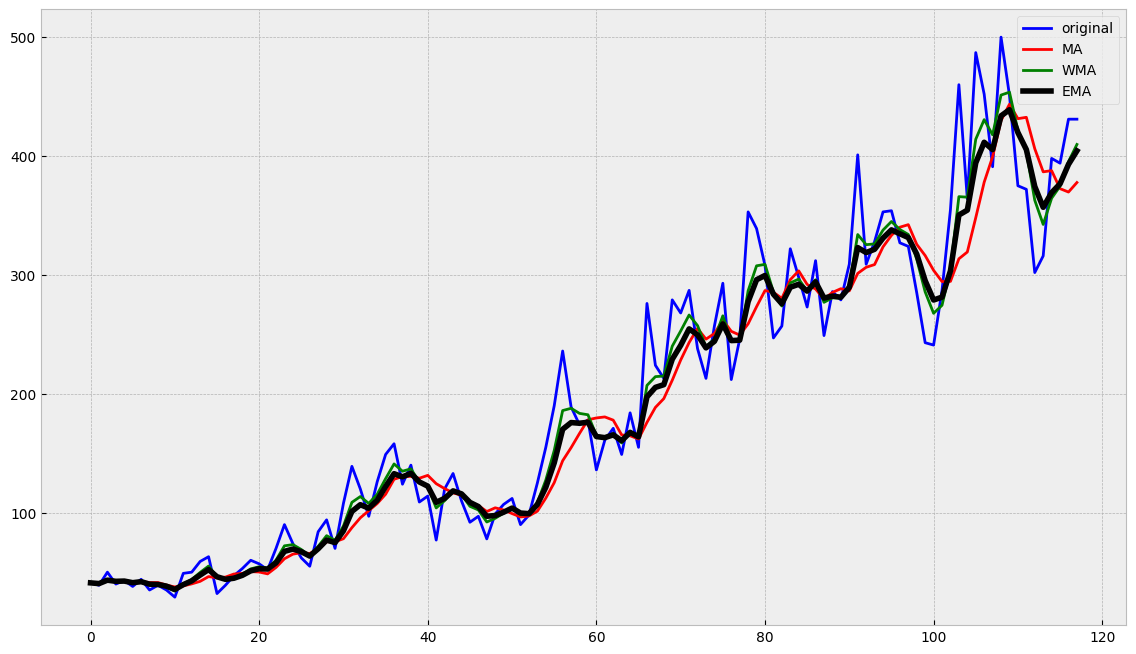

In [30]:
ema = exponential_moving_average(sales_of_company_x["Count"], 0.3)
wma = weighted_moving_average(sales_of_company_x["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

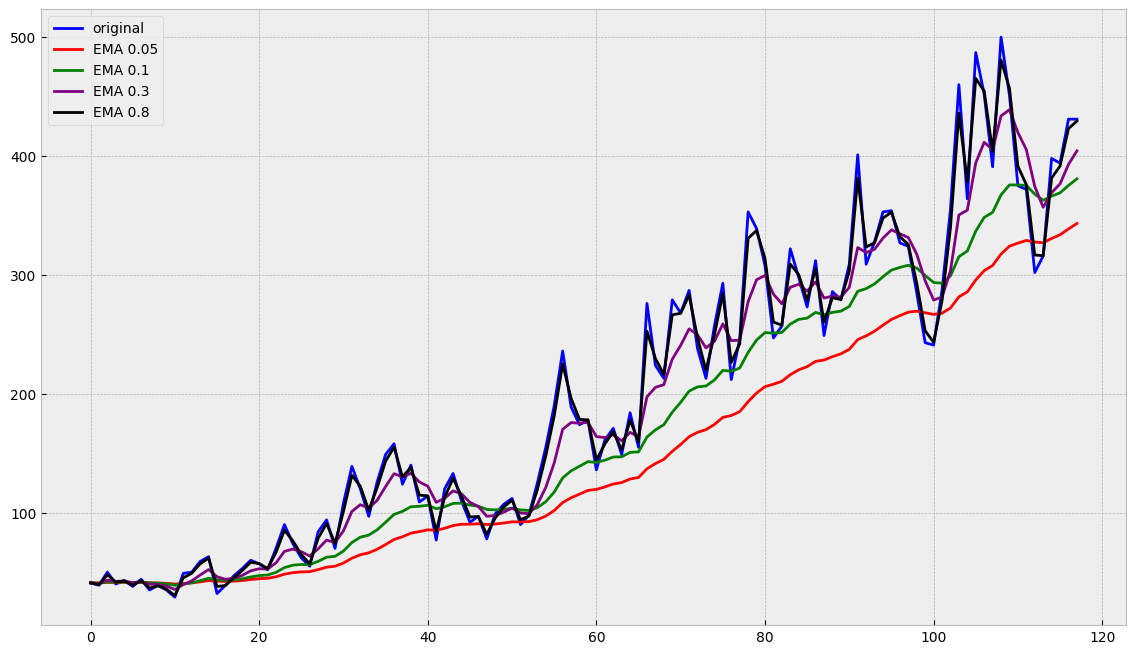

In [31]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    for i in range(len(alphas)):
        ser = exponential_moving_average(sales_of_company_x["Count"], alphas[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.legend()

### Практика 5. Напишите функцию, которая предсказывает 5 наблюдений ряда на основе ema. Возьмите ряд Monthly Boston armed robberies и спрогнозируйте

In [32]:
def exponential_moving_average(series, alpha, n_pred=None):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    if n_pred is None:
        return pd.Series(result)
    
    predictions = [alpha * series[len(series) - 1] + (1 - alpha) * result[-1]]

    for _ in range(n_pred):
        res = alpha * predictions[-1] + (1 - alpha) * result[-1]
        result.append(res)
        predictions.append(res)
    
    return pd.concat([series, pd.Series(predictions)], ignore_index=True), pd.Series(result)

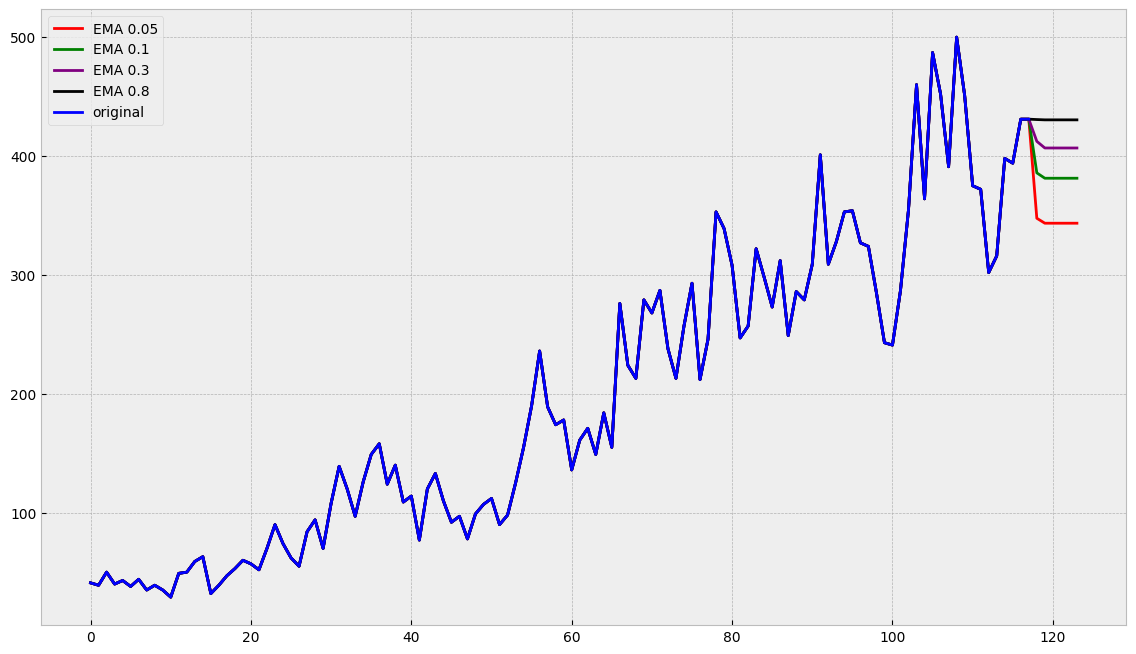

In [33]:
alphas = [0.05,0.1,0.3,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = exponential_moving_average(sales_of_company_x["Count"], alphas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='EMA {}'.format(alphas[i]))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.legend()

# Двойное экспоненциальное сглаживание

$$\hat{y}_t=l_t + s_t$$

$$\hat{y}_t=\alpha y_t + (1-\alpha)\hat{y}_{t-1}$$

$$\hat{l}_t = \alpha y_t + (1-\alpha)(l_{t-1} + s_{t-1})$$

До сих пор мы рассматривали ряд - как единую составляющую. Но на самом деле, ряд $y_t$ можно представить в виде суммы $l_t$ (уровня) и $s_t$ (тренда). По сути - тренд - это основное направление движения ряда, а уровень - колебание вокруг этого тренда.

Для предсказания уровня мы используем подход на основе классического EMA:

$l_t = \alpha y_t + (1-\alpha)(l_{t-1} + s_{t-1})$

Для прогноза тренда используем так же EMA и простое соображение: историческое значение тренда - это историческое значение тренда, а текущее значение тренда - это изменение уровня. Получим такую формулу:

$s_t = \beta (l_t - l_{t-1}) + (1 - \beta) s_{t-1}$

Итоговый ряд предсказываем по следующей формуле

$\hat{y}_{t+1} = l_t + s_t$

In [34]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return pd.Series(result)

In [35]:
def plot_dema(alpha, beta):
    dema = double_ema(sales_of_company_x["Count"], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(sales_of_company_x["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='4', label='DEMA')
        plt.title("alpha={}, beta={}".format(alpha, beta))
        plt.legend()

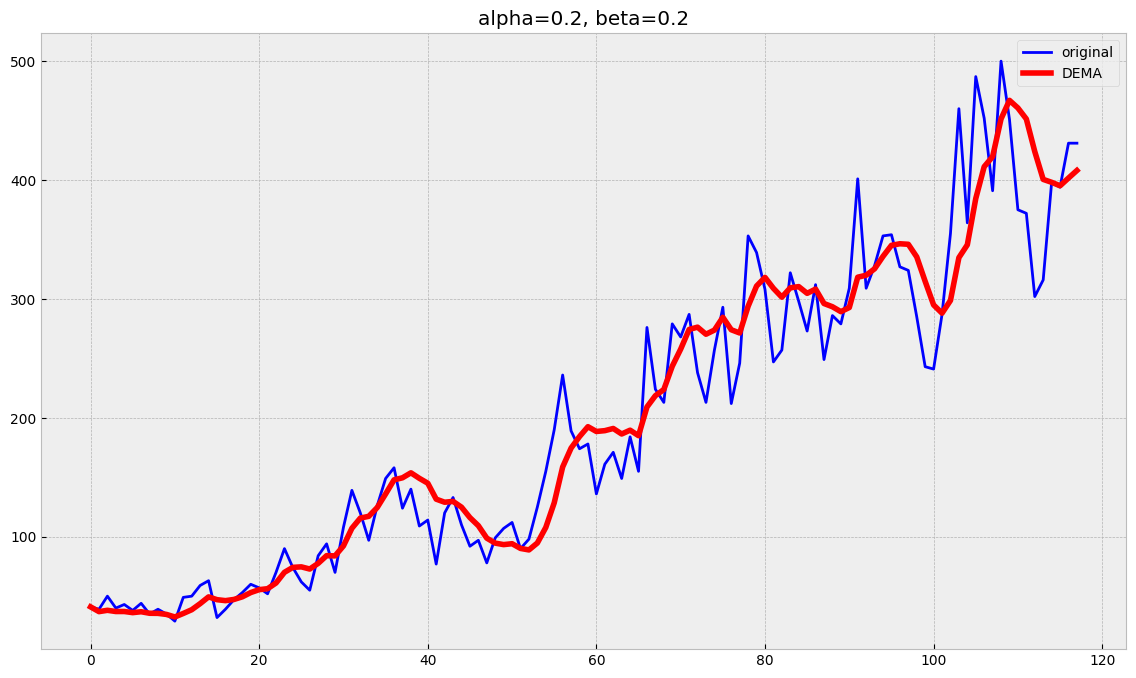

In [36]:
plot_dema(0.2, 0.2)

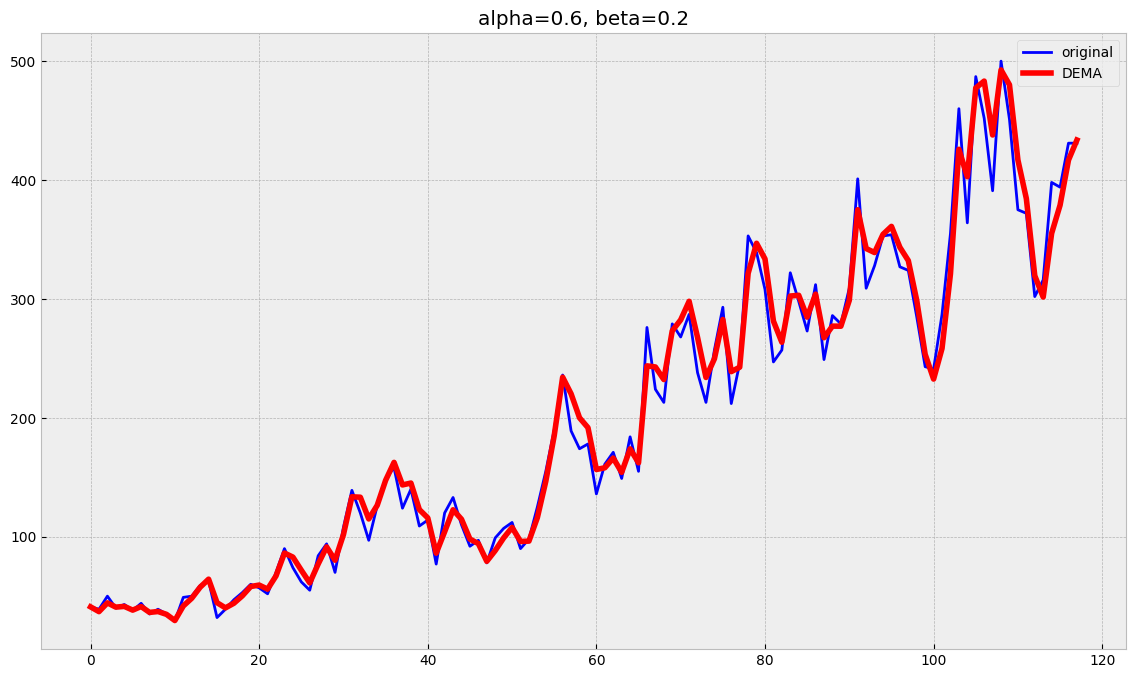

In [37]:
plot_dema(0.6, 0.2)

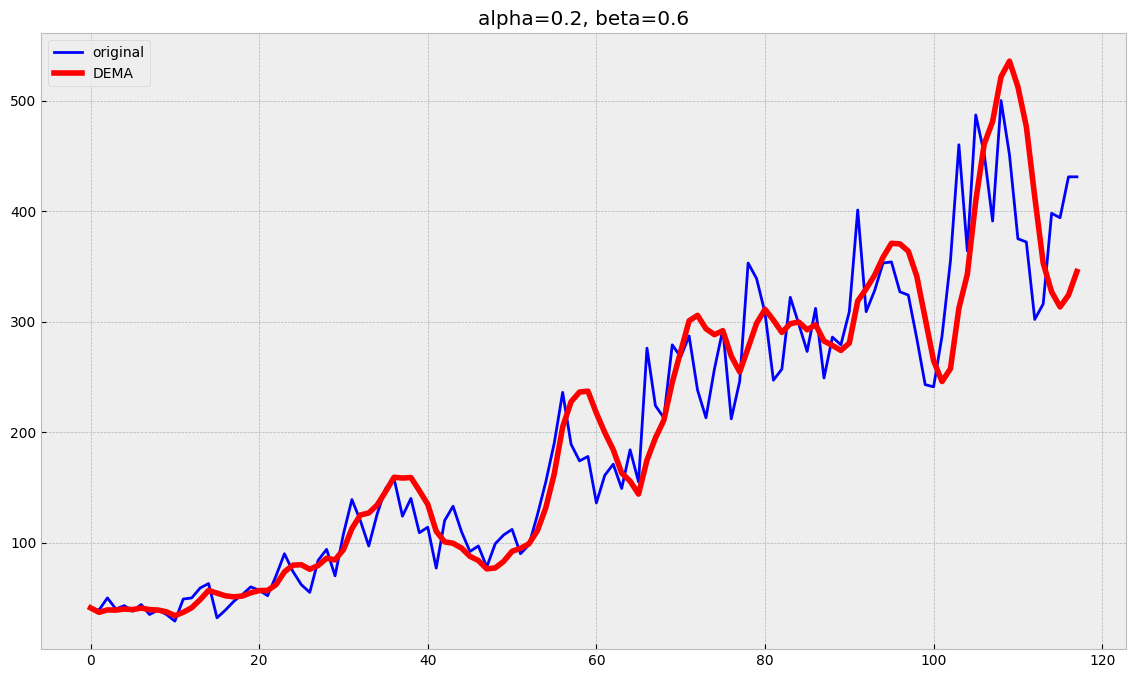

In [38]:
plot_dema(0.2, 0.6)

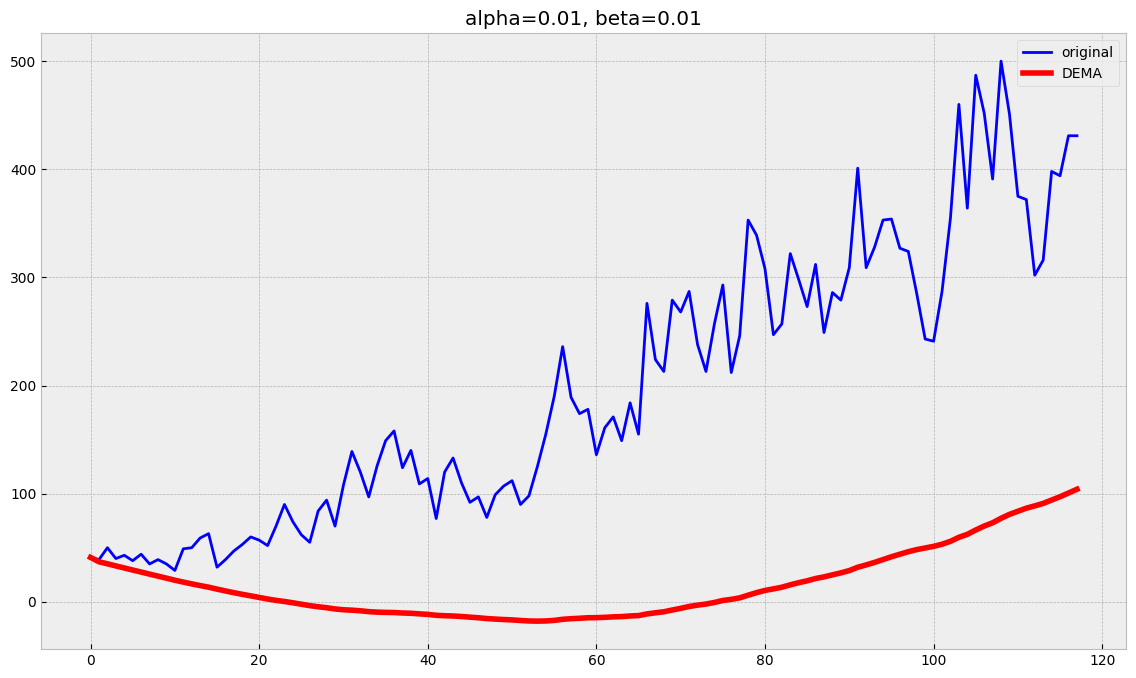

In [39]:
plot_dema(0.01, 0.01)

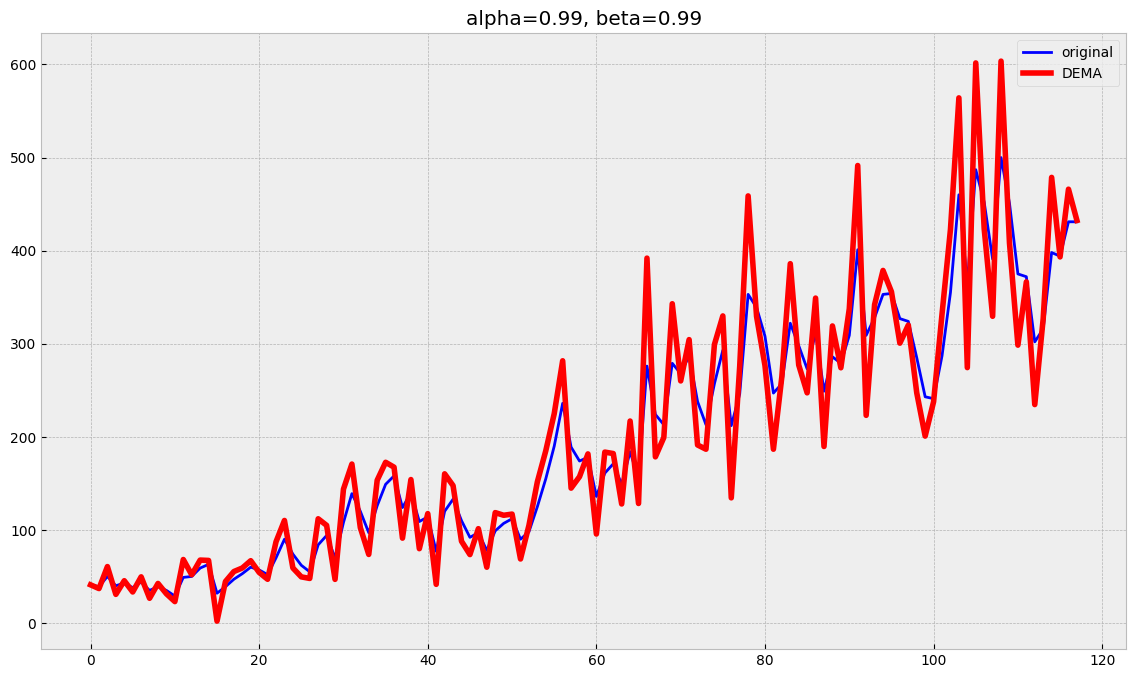

In [40]:
plot_dema(0.99, 0.99)

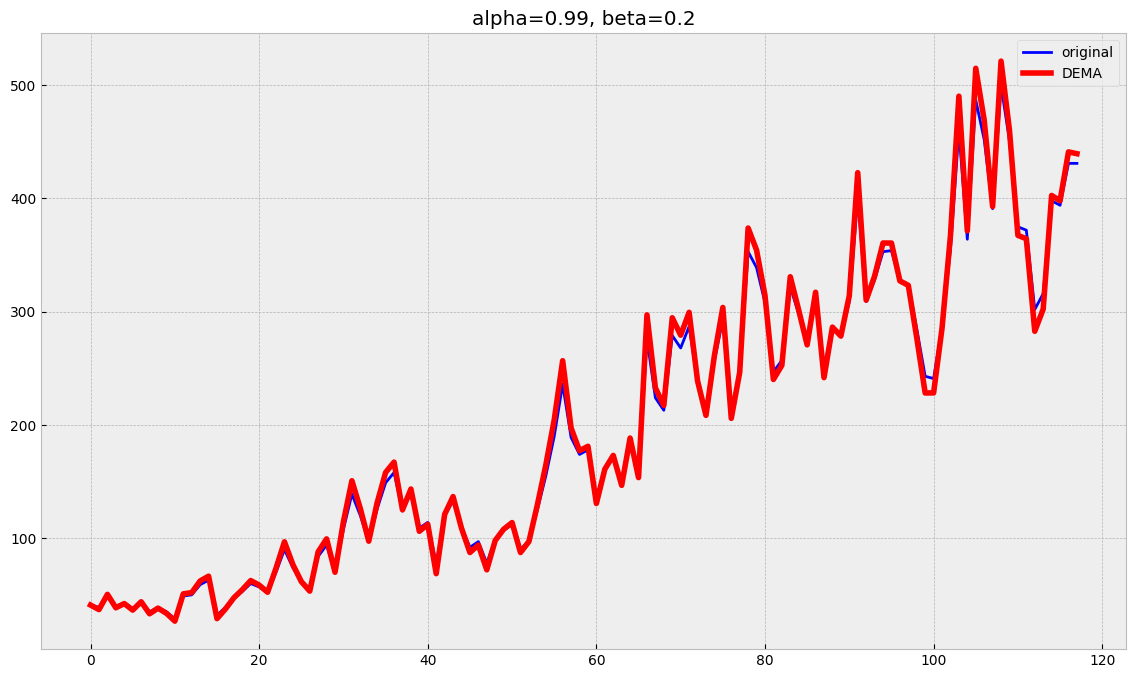

In [41]:
plot_dema(0.99, 0.2)

Как мы видим, настройка параметров $\alpha$ и $\beta$ может порой давать самые причудливые результаты. $\alpha$ отвечает за сглаживание ряда вокруг тренда, $\beta$ - за сглаживание самого тренда. Чем больше значения, тем более значимыми будут последние наблюдения и менее значимой будет история.

### Практика 6. Напишите функцию, которая предсказывает 5 наблюдений ряда на основе double_ema. Возьмите ряд Monthly Boston armed robberies и спрогнозируйте

In [42]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
        
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
        preds.append(level + trend)

    return pd.concat([series, pd.Series(preds)], ignore_index=True), pd.Series(result)

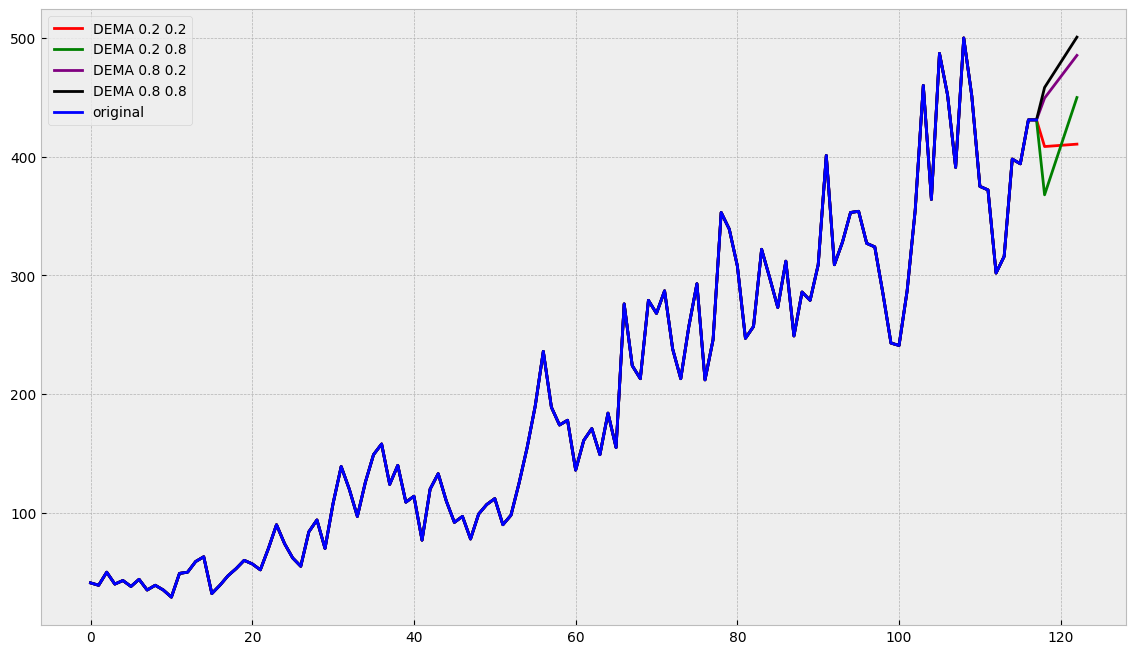

In [43]:
alphas = [0.2,0.2,0.8,0.8]
bettas = [0.2,0.8,0.2,0.8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(sales_of_company_x["Count"], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label='DEMA {} {}'.format(alphas[i], bettas[i]))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.legend()

# Хольт-Винтерс

Суть метода в том, что начинаем еще учитывать сезонность. Она учитывается в виде третьей компоненты.

**Важно** - метод применим только в случае сезонности. Если ее нет - метод хольта-винтерса не даст хороших результатов;

$l_t = \alpha(y_t - p_{t-\tau}) + (1-\alpha)(l_{t-1} + s_{t-1})$


$s_t = \beta(l_t - l_{t-1}) + (1-\beta)s_{t-1}$

$p_t = \gamma(y_t - l_t) + (1-\gamma)p_{t-\tau}$

$\hat{y}_{t+m} = l_x + s_t + p_{t-\tau+1+(m-1)mod\tau}$

Сезонная компонента $p_t$ объясняет повторяющиеся колебания вокруг уровня и тренда; ее параметр - период, после которого начинаются повторения колебаний. Для каждого наблюдения в сезоне формируется своя компонента, например, если длина сезона составляет 3, то мы получим 3 сезонные компоненты.

В уровене из значения ряда теперь вычитается сезонная компонента;

Тренд остаётся без изменений;

Сезонная компонента зависит от текущего значения ряда за вычетом уровня и от предыдущего значения компоненты.

**При сглаживании сезонной компоненты - она сглаживается только со своими измерениями**

In [44]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) / season_len

In [45]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [46]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [47]:
def plot_tema(alpha, beta, gamma, ser=sales_of_company_x["Count"], ser_to_plot=sales_of_company_x["Count"], n_preds=24):
    tema = triple_exponential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue',label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title("alpha={}, beta={}, gamma={}".format(alpha, beta, gamma))
        plt.legend()

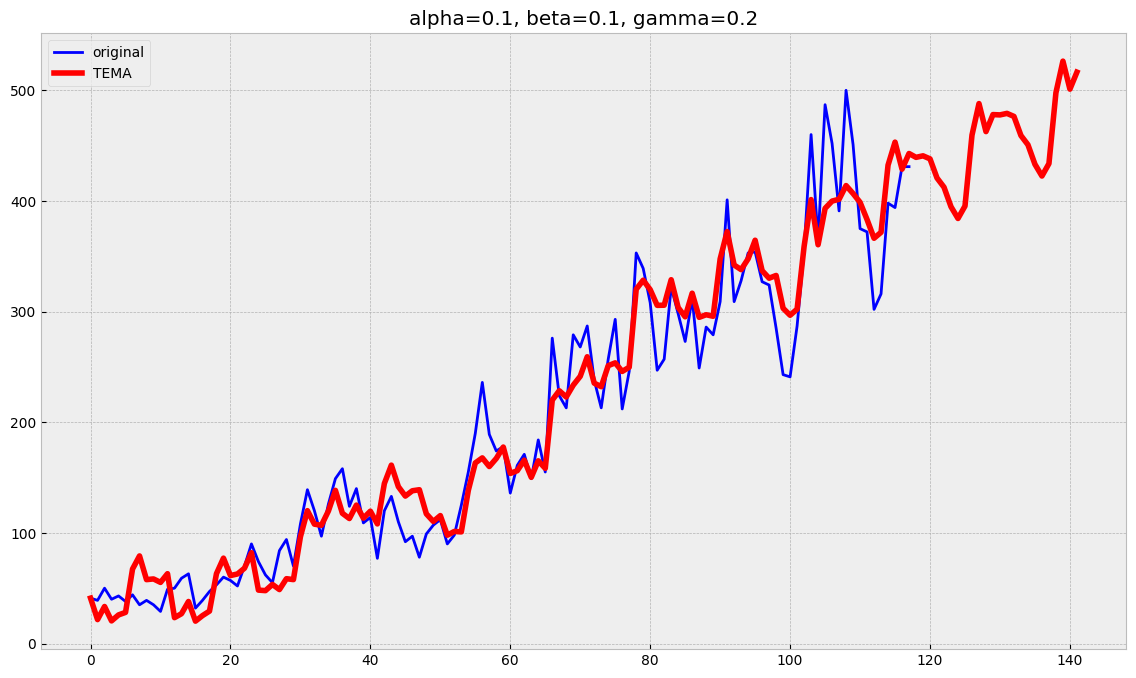

In [48]:
plot_tema(0.1, 0.1, 0.2)

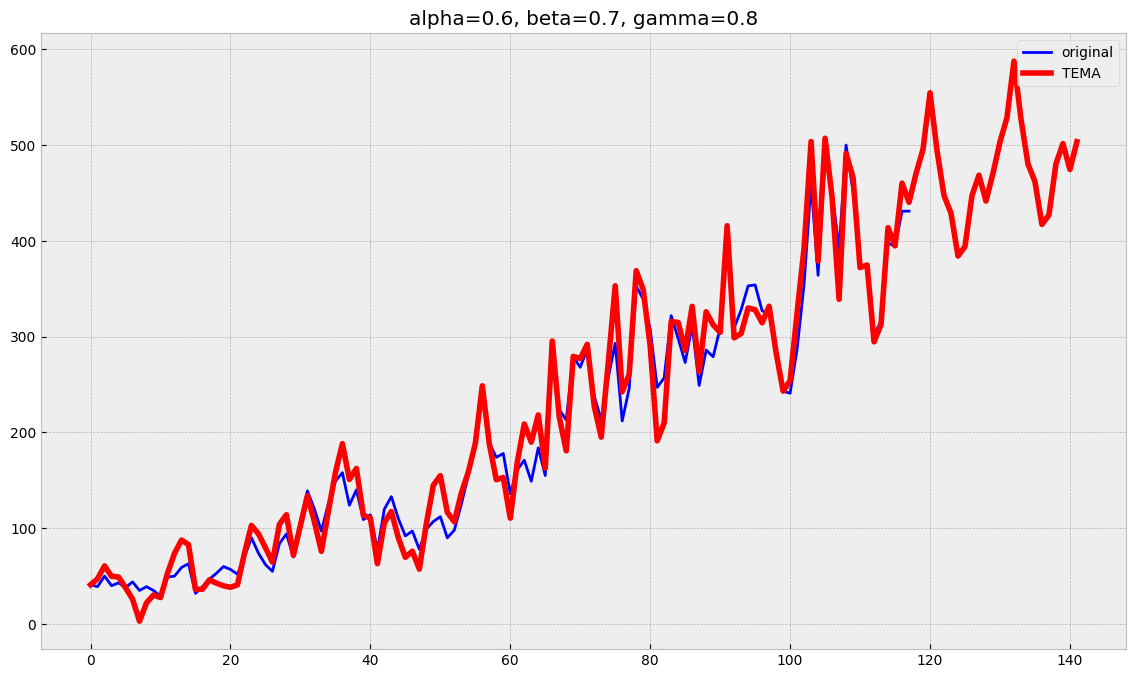

In [49]:
plot_tema(0.6, 0.7, 0.8)

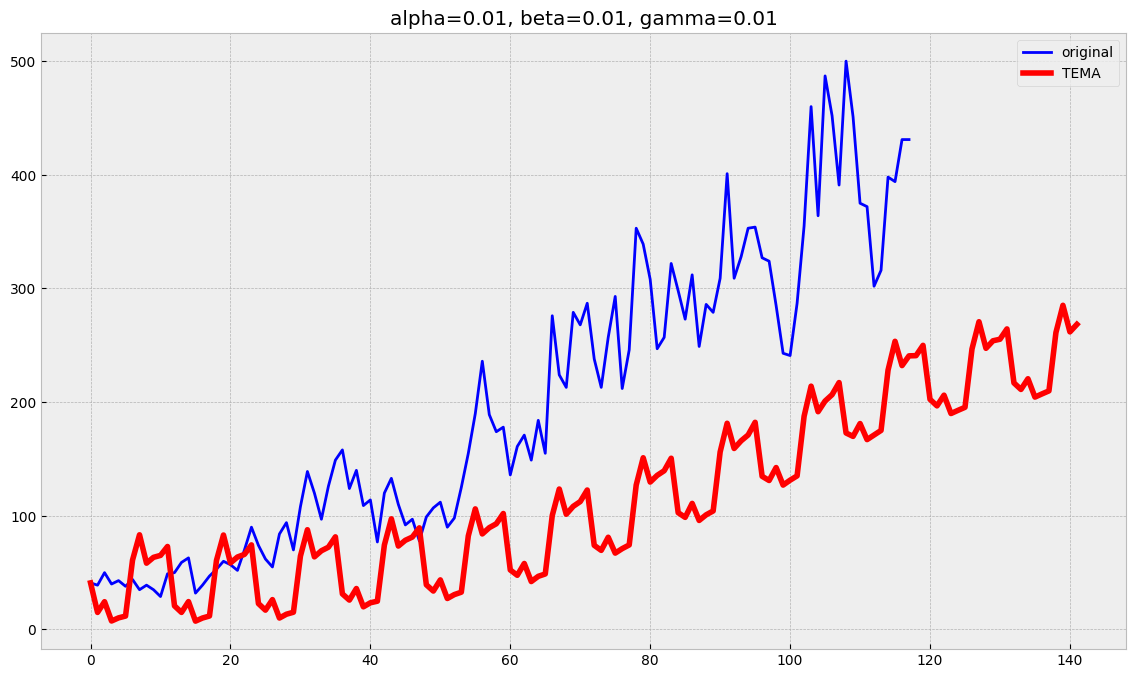

In [50]:
plot_tema(0.01, 0.01, 0.01)

# Подбор параметров

Что значит, что наша модель лучше всего приближает исходные данные? Это значит, что минимизируется некоторая функция ошибки. Мы, для простоты, будет считать стандарнтый RMSE:

$RMSE =  \sqrt {1/n \sum^N_{i=1} (\hat{y}_i - y_i)^2}$

Алгоритм поиска стандартный - метод градиентного спуска. Считаем производный по каждому из параметров и спускаемся в сторону минимума.

In [51]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [52]:
series = sales_of_company_x["Count"]

In [53]:
train, test, val = series[:60], series[60:70], series[70:]

In [54]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_exponential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [55]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

In [56]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 1947.7436454535225
        x: [ 1.000e+00  7.536e-02  1.000e+00]
      nit: 6
      jac: [-4.192e+02  4.547e-05 -0.000e+00]
     nfev: 28
     njev: 7
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


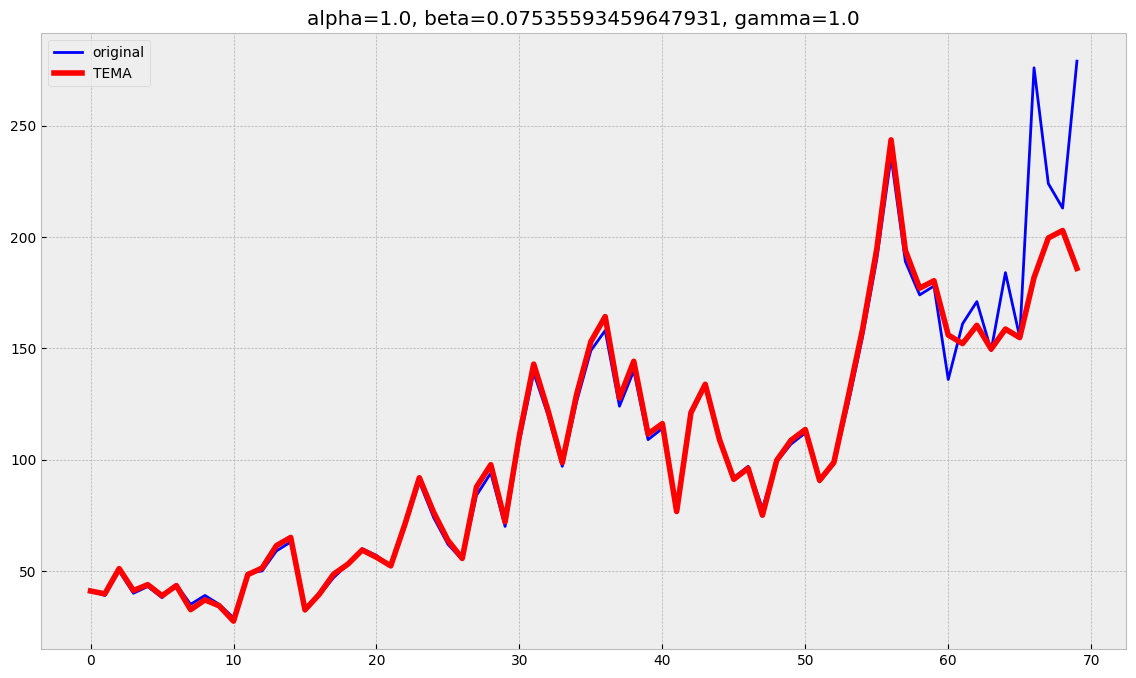

In [57]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:70], n_preds=len(test))

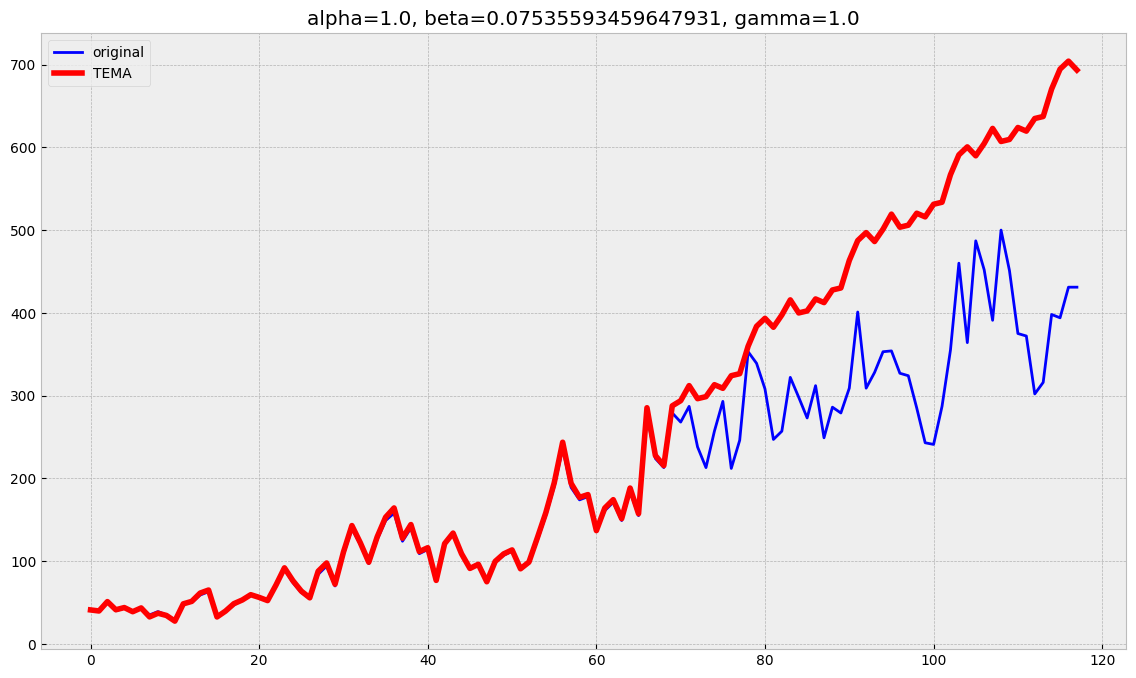

In [58]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:70], ser_to_plot=series, n_preds=len(val))

# Кросс-валидация

Проблема кросс-валидации на временных рядах состоит в том, что случайно перемешивать в фолдах значения всего ряда нельзя. Т.к. он имеет временную структуру, и ее надо сохранять (иначе потеряются все взаимосвязи наблюдений);

Будем делать кросс-валидацию на скользящем окне.

Суть достаточно проста:
1. Берем t измерений
2. Делаем прогноз на n измерений вперед и считаем ошибку
3. Берем t+n измерений
4. Делаем прогноз на n измерений вперед и считаем ошибку
5. Берем t+2*n измерений
6. Делаем прогноз на n измерений вперед и считаем ошибку
...

In [59]:
train, val = series[:65], series[65:]

In [60]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3) 
    errors = []
    
    for train_split, test_split in split.split(train):
        train_split_ts = train.iloc[train_split]
        test_split_ts = train.iloc[test_split]
#         print(train_split_ts)
#         print(test_split_ts)
        result = triple_exponential_smoothing(train_split_ts, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split_ts):]
        error = mean_squared_error(predictions, test_split_ts)
        errors.append(error)
    print(f'{np.mean(np.array(errors))}------------')
    return np.mean(np.array(errors))

In [61]:
opt = minimize(mse_cross_val, x0=[0,0,0], method="Nelder-Mead", bounds = ((0, 1), (0, 1), (0, 1)))
# opt = minimize(mse_cross_val, x0=[0,0,0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

7693.879420653301------------
7650.054332135084------------
7693.879420653301------------
7690.317755931011------------
7662.254969679433------------
7641.29100125187------------
7615.2190503766615------------
7595.115021105853------------
7548.256843787068------------
7547.1030447954------------
7490.616516607843------------
7454.2198521648725------------
7359.4425378180895------------
7320.520671811703------------
7180.394635699439------------
7144.386438662633------------
6956.133547388427------------
6857.508893807072------------
6575.022852802654------------
6481.2078523534465------------
6109.638832129432------------
5978.868736562541------------
5509.167972870285------------
5318.525402957323------------
4756.120176836436------------
4582.998642052302------------
4001.5813792139816------------
3811.2909179170942------------
3284.604380278585------------
3128.1846864834893------------
2743.23232398833------------
2651.538310941203------------
2460.2519849842806------------
2430.6

In [62]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2416.173264021953
             x: [ 1.760e-01  0.000e+00  0.000e+00]
           nit: 73
          nfev: 141
 final_simplex: (array([[ 1.760e-01,  0.000e+00,  0.000e+00],
                       [ 1.761e-01,  0.000e+00,  0.000e+00],
                       [ 1.760e-01,  0.000e+00,  0.000e+00],
                       [ 1.761e-01,  0.000e+00,  0.000e+00]]), array([ 2.416e+03,  2.416e+03,  2.416e+03,  2.416e+03]))


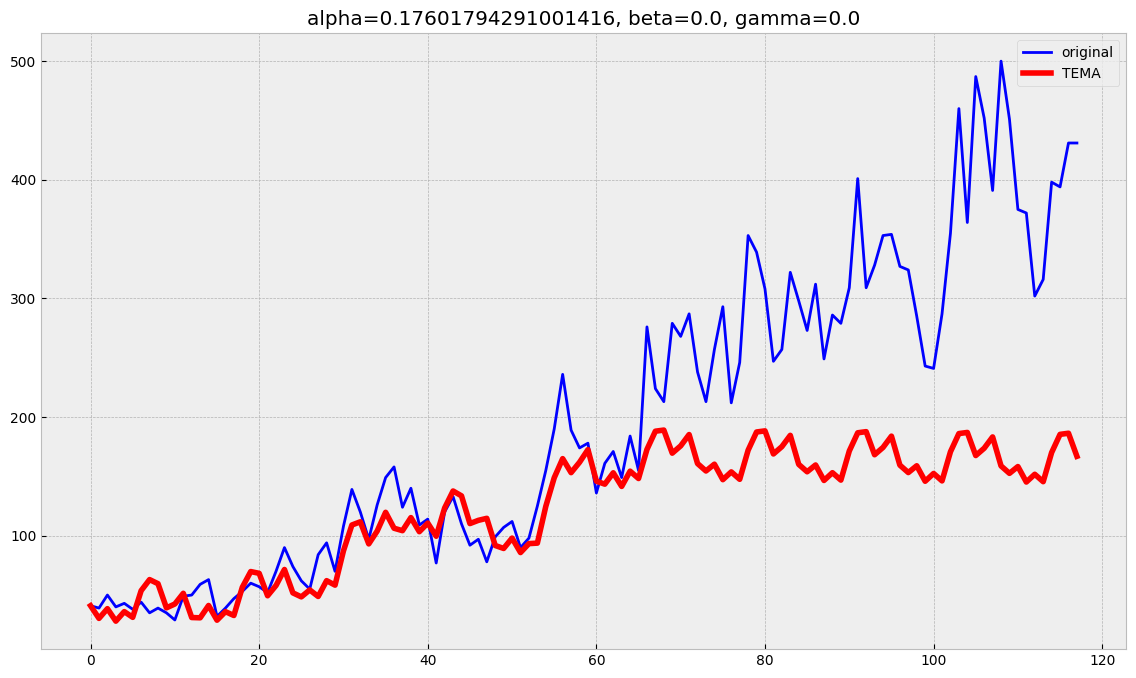

In [63]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series, n_preds=len(val))

## Домашнее задание

Взять с прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA. Оценить качество и прислать соображения почему была выбрана та или иная модель

# Дополнительно почитать

[Triple Exponential Smoothing](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc435.htm)

[Holt-Winters Forecasting for Dummies (or Developers)](https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/)